### Calculations to accompany Section II.B of:
## A computational introduction to quantum statistics using harmonically trapped particle

#### Martin Ligare, Department of Physics & Astronomy, Bucknell Univeristy

                                              Abstract
   In a 1997 paper Moore and Schroeder argued that the development of student understanding
of thermal physics could be enhanced by computational exercises that highlight the link between
the statistical definition of entropy and the second law of thermodynamics [Am. J. Phys. 65, 26
(1997)]. I introduce examples of similar computational exercises for systems in which the quantum
statistics of identical particles plays an important role. I treat isolated systems of small numbers of
particles confined in a common harmonic potential, and use a computer to enumerate all possible
occupation-number configurations and multiplicities. The examples illustrate the effect of quantum
statistics on the sharing of energy between weakly interacting subsystems, as well as the distribution
of energy within subsystems. The examples also highlight the onset of Bose-Einstein condensation
in small systems.



Section II.B first considers $N_B = 20$ bosons interacting with $N_D=20$ distinguishable particles in
a 1-D harmonic trap, with $E=40\epsilon$ units of energy, shairing $\epsilon = \hbar\omega$.  The 
calculations are analogous to those done in Moore and Schroeder's 1997 paper, except the the mutiplicities
of the macrostates for the bosons is different from that for distinguishable particles. Similar calculations 
are then done for $N_B=20$ bosons interacting with $N_F=20$ fermions.

As discussed in the paper, the multipicities for distinguishable particles is
$$
\Omega^{\textrm{D})}(N,q) = \binom{q + N - 1}{q} = \frac{(q+N-1)!}{q!(N-1)!},
$$

while that for bosons is

$$
\Omega^{(\textrm{B})}(N,q) = p( q\, |\, \mbox{number of parts $\leq N$}),
$$

where $p$ is the function returning the number of integer partions of $q$ with the number
of parts less than $N$, and that for fermions is

\begin{eqnarray*}
\Omega^{(\textrm{F})}(N,q) &=& \Omega^{(\textrm{B})}(N,q-q^{(F)}_{T=0})
                                   \nonumber \\
                   &=&  p( q-N(N-1)/2\, |\, \mbox{number of parts $\leq  N$})
\end{eqnarray*}

In [1]:
import numpy as np
from scipy import special
from sympy.utilities.iterables import partitions

import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# Following is an Ipython magic command that puts figures in notebook.
%matplotlib notebook
        
# M.L. modifications of matplotlib defaults
# Changes can also be put in matplotlibrc file, 
# or effected using mpl.rcParams[]
mpl.style.use('classic') 
plt.rc('figure', figsize = (6, 4.5)) # Reduces overall size of figures
plt.rc('axes', labelsize=16, titlesize=14)
plt.rc('figure', autolayout = True) # Adjusts supblot parameters for new size

#### Functions returning mulitplicities of $n$ paticles with $q$ units of energy in 1-D harmonic trap

In [7]:
def omega_D(q,n):
    '''Multiplicity of n distinguishable particles with q units of 
    energy; Eq. (3) of manuscript.'''
    return special.binom(q+n-1,q)

def omega_B(q,n):
    '''Multiplicity of n bosons with q units of energy; 
    Eq. (6) of manuscript'''
    count = 0
    for p in partitions(q,n):
        count += 1
    return count

def omega_F(q,n):
    '''Mulitplicity of n fermions with q units of energy;
    Eq. (7) of manuscript'''
    eF = n*(n-1)/2    # Fermi energy
    return omega_B(int(q-eF), n)

#### Calculate multiplicities and entropies

In [ ]:
%%time
n_particles = 20
energy_total = 80
eF  = int(n_particles*(n_particles -1)/2)  # Fermi energy

q = np.linspace(0,energy_total, energy_total+1)
omega_D_vals = omega_D(q, n_particles)
omega_B_vals = omega_B(q, n_particles)
omega_F_vals = omega_F(q + eF, n_particles)

In [ ]:
%%time 
omega_B(np.array(60), n_particles)

In [ ]:
tmp = np.array([50,51])
tmp.any

In [9]:
%%time
n_particles = 20
energy_total = 80
eF  = int(n_particles*(n_particles -1)/2)  # Fermi energy

omega_D_vals = np.zeros(energy_total+1)
omega_B_vals = np.zeros(energy_total+1)
omega_F_vals = np.zeros(energy_total+1)

for q in range(energy_total+1):
    omega_D_vals[q] = omega_D(q, n_particles)
    omega_B_vals[q] = omega_B(q, n_particles)
    omega_F_vals[q] = omega_F(q + eF, n_particles)
    #print(i) # progress monitor
    
s_D = np.log(omega_D_vals)
s_B = np.log(omega_B_vals)
s_F = np.log(omega_F_vals)

CPU times: user 4min 19s, sys: 168 ms, total: 4min 20s
Wall time: 4min 20s


<IPython.core.display.Javascript object>


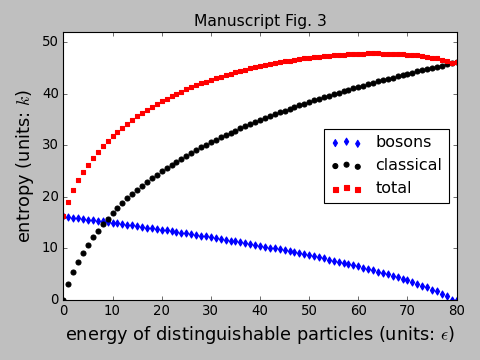

In [10]:
plt.figure()
x = np.linspace(0, energy_total, energy_total+1)
yB = np.flip(s_B)
yD = s_D
plt.xlim(0,energy_total)
plt.ylim(0,52)
plt.scatter(x, yB, label='bosons', marker='d', color='blue')
plt.scatter(x ,yD, label='classical', marker='o', color='black')
plt.scatter(x, yB+yD, label='total', marker='s', color='r')
plt.xlabel('energy of distinguishable particles (units: $\epsilon$)')
plt.ylabel('entropy (units: $k$)')
plt.legend(loc='best')
plt.title('Manuscript Fig. 3');

#### Calculate temperatures 

\begin{eqnarray*}
\frac{1}{T_i} &=& \left.\frac{dS}{dq}\right\vert_i \\
            &\simeq& \frac{S_{i+1} - S_{i-1}}{2\epsilon}
\end{eqnarray*}
Solving for $T_i$ gives
$$
T_i \simeq \frac{2\epsilon}{S_{i+1} - S_{i-1}}.
$$

In [11]:
t_D = 2/(s_D[3:len(s_D)] - s_D[1:len(s_D)-2])   # Temp. for Distinguishable particles
t_B = 2/(s_B[3:len(s_B)] - s_B[1:len(s_B)-2])   # Temp. for Bosons

<IPython.core.display.Javascript object>


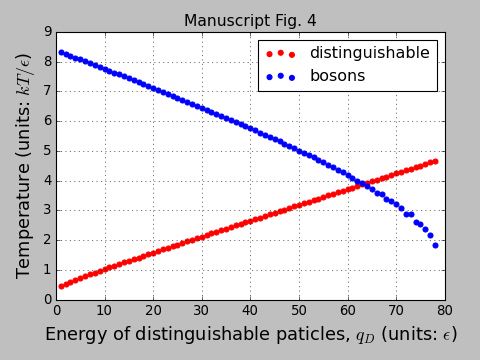

In [12]:
plt.figure()
x = np.linspace(1,energy_total-2,energy_total-2)
plt.scatter(x, t_D, color='red', label='distinguishable')
plt.scatter(x, np.flip(t_B), color='blue', label='bosons')
plt.xlim(0,energy_total)
plt.grid()
plt.xlabel('Energy of distinguishable paticles, $q_D$ (units: $\epsilon$)')
plt.ylabel('Temperature (units: $kT/\epsilon$)')
plt.title('Manuscript Fig. 4')
plt.legend()
plt.ylim(0,9);

<IPython.core.display.Javascript object>


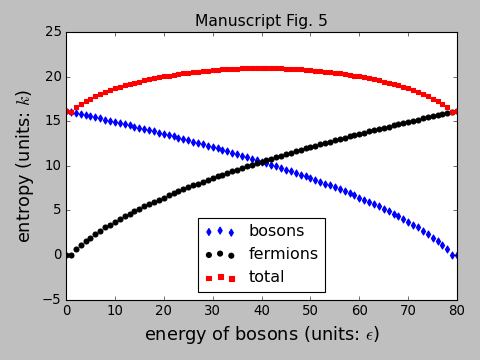

In [13]:
plt.figure()
x = np.linspace(0, energy_total, energy_total+1)
yF = np.flip(s_F)
yB = s_B
plt.xlim(0,energy_total)
#plt.ylim(0,52)
plt.scatter(x, yF, label='bosons', marker='d', color='blue')
plt.scatter(x ,yB, label='fermions', marker='o', color='black')
plt.scatter(x, yF+yB, label='total', marker='s', color='r')
plt.xlabel('energy of bosons (units: $\epsilon$)')
plt.ylabel('entropy (units: $k$)')
plt.legend(loc='best')
plt.title('Manuscript Fig. 5');

#### Version information
`version_information` is from J.R. Johansson (`jrjohansson at gmail.com`); see <a href='http://nbviewer.jupyter.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-0-Scientific-Computing-with-Python.ipynb'>Introduction to scientific computing with Python</a> for more information and instructions for package installation.

In [14]:
%load_ext version_information

In [15]:
version_information numpy, scipy, sympy, matplotlib

Software versions
Python 3.7.7 64bit [GCC 7.3.0]
IPython 7.16.1
OS Linux 4.9.0 9 amd64 x86_64 with debian 9.13
numpy 1.18.5
scipy 1.5.0
sympy 1.6.1
matplotlib 3.2.2
Thu Dec 10 12:01:00 2020 EST